<a href="https://colab.research.google.com/github/sujatha-sureshkmr/Hand-onLearning-ML/blob/master/Book_Hands-On-ML_Ed2/Chpt2_California_Housing_Price/California_housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here are the main steps you will go through:

1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

# **Objective**
A prediction of a district’s median housing price. The downstream system will determine whether it is worth investing in a given area or not. Getting this right is critical, as it directly affects revenue.

> Supervised Learning (each instance comes with the expected output, i.e., the district’s median housing price) Supervised learning problem is one where you have values for your target variable. In unsupervised learning you won’t have that. Here you are trying to predict median housing prices. The dataset you have gives you that. You use that data to train. I.e, you tell the algorithm these are some sample housing prices and to learn from it. In unsupervised learning, you do not know target variable values



> Regression task : Predict a value (district pricing)

> Multiple regression problem -> Multiple inputs

> Univariate regression problem -> Predict single value for each district or group



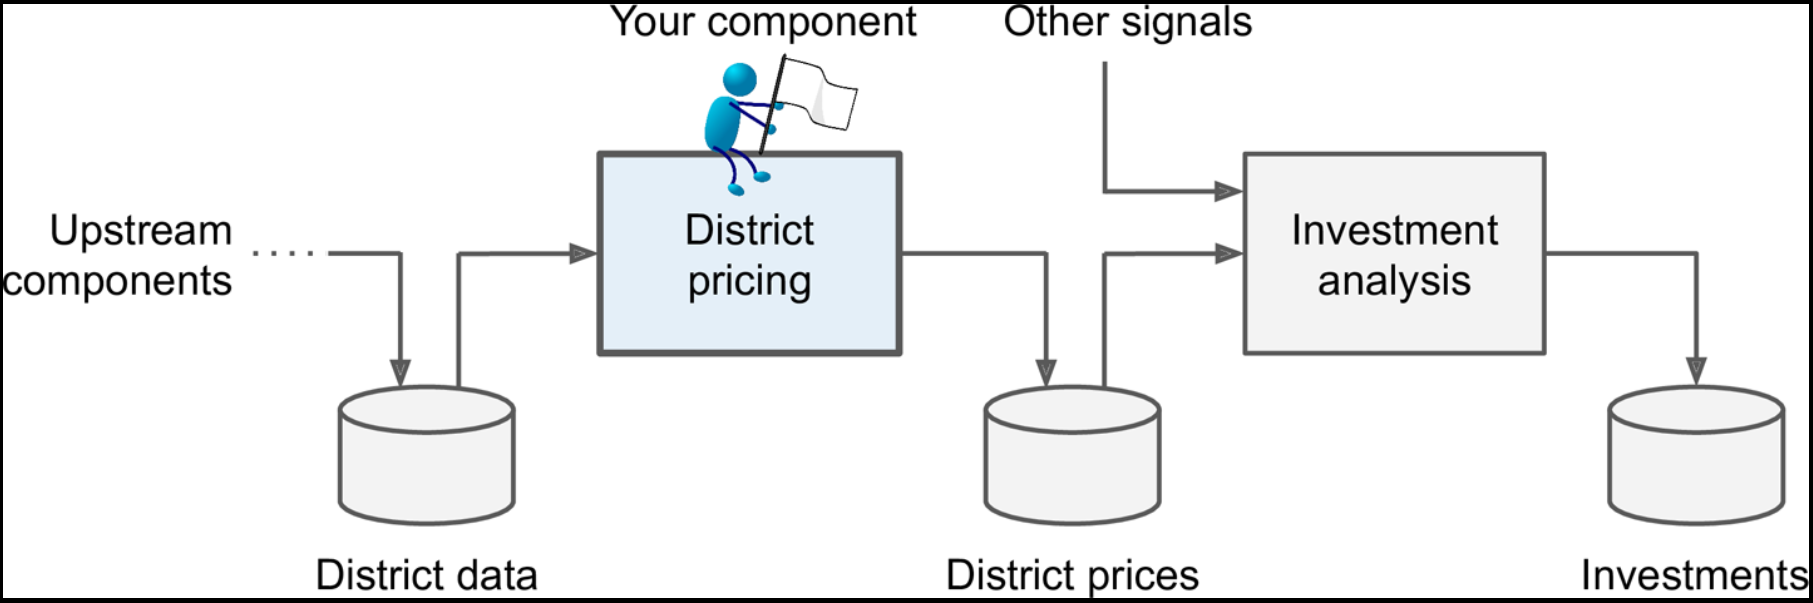

# **Performance Measure**
Typical performance measure for regression problems is the Root Mean Square Error (RMSE)

RMSE(X,h)=√1/m∑i=1m(h(x(i))−y(i))2

MAE(X,h)=1m∑i=1m∣∣h(x(i))−y(i)∣∣

Both the RMSE and the MAE are ways to measure the distance between two vectors: the vector of predictions and the vector of target values. 

The higher the norm index, the more it focuses on large values and neglects small ones. This is why the RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.


# **Understanding Data**

A quick way to understand catrgorical data:
>To identify various categories and its significance over the dataset. 
print(housing["ocean_proximity"].value_counts())

A quick way to understand countinuous data:
> Check 25%, 50%, 75%

> Histogram

# **Requirement**
> The median income is a very important attribute to predict median housing prices (Categorical representation of the median income is required).

In [23]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [133]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import tarfile
import urllib
import os
import shutil
import pandas as pd
import textwrap

from google.colab import drive
drive.mount('/content/drive')
dataset_dir = '/content/drive/My Drive/Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# **Data Exploration**

In [5]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master"
HOUSING_PATH = "datasets/housing"
HOUSING_FILE = "housing.tgz"
FULL_URL = DOWNLOAD_ROOT + "/" + HOUSING_PATH + "/" + HOUSING_FILE
download_dir = os.path.join(dataset_dir,HOUSING_PATH)

def download_data(url):
  if not os.path.exists(download_dir):
    os.makedirs(download_dir)
  tgz_path = os.path.join(download_dir,HOUSING_FILE)
  urllib.request.urlretrieve(url,tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=download_dir)
  housing_tgz.close()

def load_data(url = FULL_URL):
  if not os.path.exists(os.path.join(download_dir,HOUSING_FILE)):
    download_data(url)
  csv_path = os.path.join(download_dir,"housing.csv")
  return pd.read_csv(csv_path)

In [ ]:
shutil.rmtree(download_dir)
drive.flush_and_unmount()

In [27]:
## Download & Load data
housing = load_data()
print(color.BOLD + color.DARKCYAN + 'Housing - Top 5 rows'+ color.END)
housing.head()

Housing - Top 5 rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
print(color.BOLD + color.DARKCYAN + 'Housing - Data information'+ color.END)
housing.info()

Housing - Data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


>Total_bedrooms attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. This has to be corrected.

>All attributes are numerical, except the ocean_proximity field. It is a categorical field

In [25]:
print(color.BOLD + color.DARKCYAN + 'Ocean Proximity - Category'+ color.END)
print(housing["ocean_proximity"].value_counts())
print('\n')
print(color.BOLD + color.DARKCYAN + 'Housing - Describe Statistical'+ color.END)
housing.describe()

Ocean Proximity - Category
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


Housing - Describe Statistical


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Countinuous Attributes - Historgram


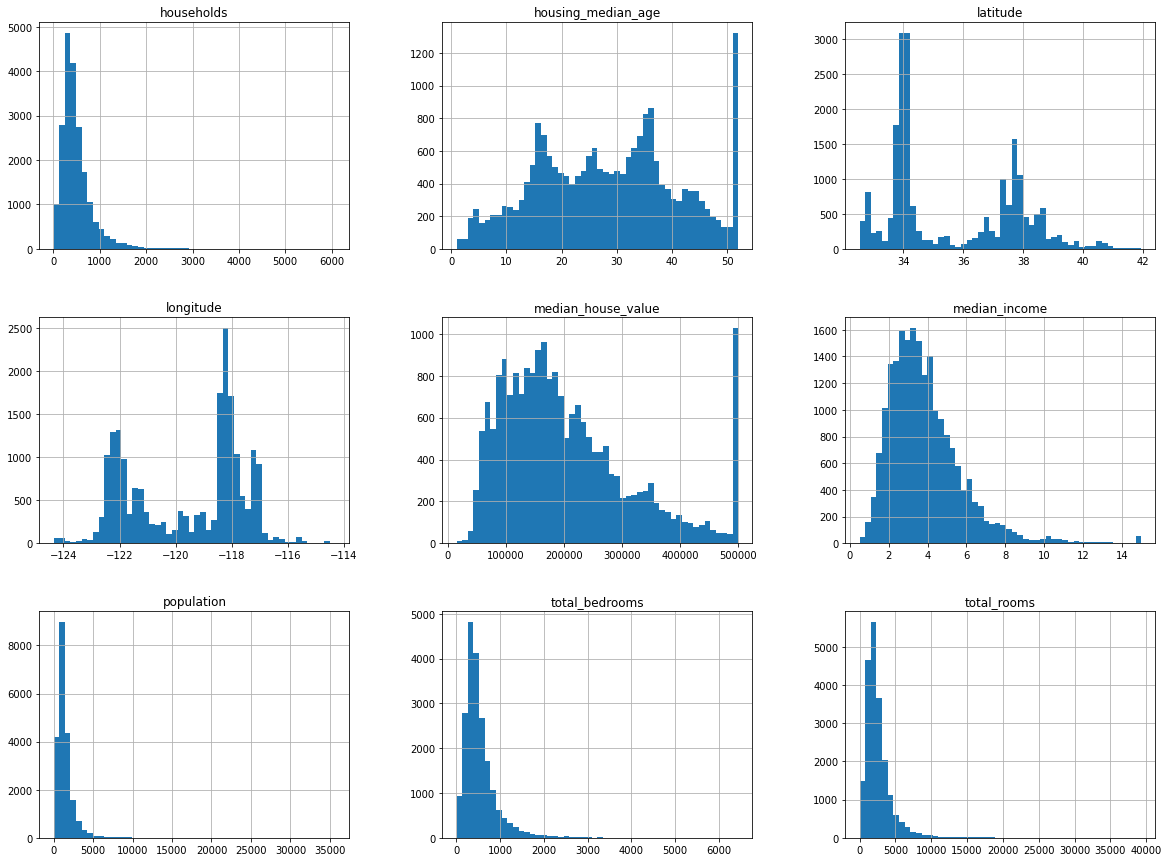

In [29]:
print(color.BOLD + color.DARKCYAN + 'Countinuous Attributes - Historgram'+ color.END)
housing.hist(bins=50, figsize=(20,15))
plt.show()

# **Data Represenatation**
> Median Income data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000).

>The housing median age and the median house value were also capped. Median house value is the target value. Further investigation is required.
To obtain precise prediction of median house value:
*   Collect proper labels for the districts whose labels were capped.
*   Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).

> Attributes has different scaling.

>Many histograms are tail-heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns.


Categorical representation of Median income
  income_cat  median_income
0          5         8.3252
1          5         8.3014
2          5         7.2574
3          4         5.6431
4          3         3.8462
5          3         4.0368
6          3         3.6591
7          3         3.1200
8          2         2.0804
9          3         3.6912

 Histogram of income_cat 



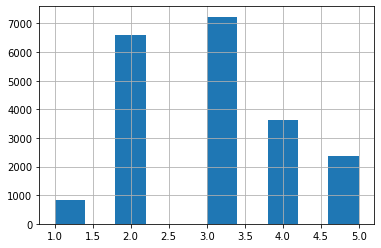

In [54]:
print(color.BOLD + color.DARKCYAN + 'Categorical representation of Median income'+ color.END)
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
income_cat_sample = housing[['income_cat', 'median_income']].head(10)
print(income_cat_sample)
print(color.BOLD + color.DARKCYAN + '\n Histogram of income_cat \n'+ color.END)
housing["income_cat"].hist()

In [65]:
print(color.BOLD + color.DARKCYAN + 'Split train_set and test_set'+ color.END)
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

print('\n'+ color.BOLD + color.DARKCYAN + 'Remove income_cat from train and test dataset'+ color.END)

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

print('\n'+ color.BOLD + color.BLUE + 'strat_train_set'+ color.END)

print(strat_train_set.info())

print('\n'+ color.BOLD + color.BLUE + 'strat_test_set'+ color.END)

print(strat_test_set.info())

Split train_set and test_set
3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

Remove income_cat from train and test dataset

strat_train_set
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB
None

strat_test_set
<class 'pandas.core.frame.Data

Preparation of exploration dataset
Visualizing Geographical Data
The radius of each circle represents the district’s population
(option s), and the color represents the price (option c). We will use
a predefined color map (option cmap) called jet, which ranges from
blue (low values) to red (high prices) 20


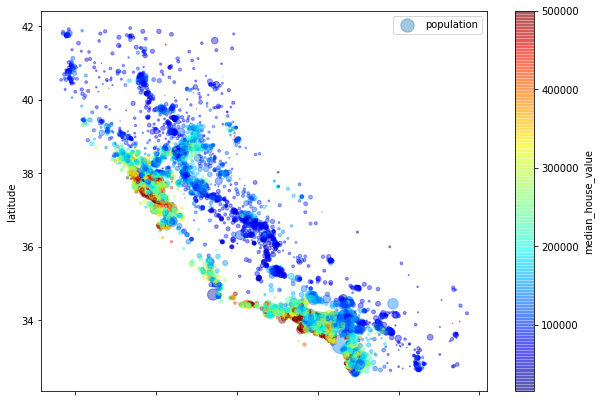

In [81]:
print(color.BOLD + color.DARKCYAN + 'Preparation of exploration dataset'+ color.END)
housing = strat_train_set.copy()
print(color.BOLD + color.BLUE + 'Visualizing Geographical Data' + color.END)
print(textwrap.fill(color.BLUE + 'The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices)'+ color.END), 20)

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

Correlations (standard correlation coefficient)
median_income         1.000000
median_house_value    0.687160
total_rooms           0.200087
households            0.010781
population            0.002380
total_bedrooms       -0.009740
longitude            -0.019583
latitude             -0.075205
housing_median_age   -0.111360
Name: median_income, dtype: float64




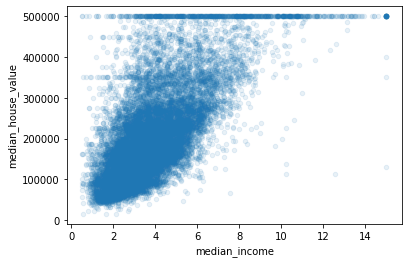

In [90]:
print(color.BOLD + color.DARKCYAN + 'Correlations (standard correlation coefficient)'+ color.END)
corr_matrix = housing.corr()
print(corr_matrix["median_income"].sort_values(ascending=False))
print('\n')
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)


# **Median Income Vs Median house value corelation analysis**
>First, the correlation is indeed very strong; you can clearly see the upward trend, and the points are not too dispersed. 

>Second, the price cap that we noticed earlier is clearly visible as a horizontal line at $500,000.

> This plot reveals other less obvious straight lines: a horizontal line around $450,000, another around $350,000, perhaps one around $280,000.

> All these districts has to be removed.

In [97]:
print(color.BOLD + color.DARKCYAN + 'New Attributes and its Corelation'+ color.END)
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))
print('\n')
print(color.BOLD + color.BLUE + 'Conclusion : Rooms per household is new valuable attribute.'+ color.END)

New Attributes and its Corelation
median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64


Conclusion : Rooms per household is new valuable attribute.


# **Data Preparation**
>This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset).

>You will gradually build a library of transformation functions that you can reuse in future projects.

>You can use these functions in your live system to transform the new data before feeding it to your algorithms.

>This will make it possible for you to easily try various transformations and see which combination of transformations works best.

**Handling missing values - Continuous Attributes**

>Get rid of the corresponding districts.

>Get rid of the whole attribute.

>Set the values to some value (zero, the mean, the median, etc.).

**Data cleansing - Handling Text and Categorical Attributes** 

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. 

This may be fine in some cases (e.g., for ordered categories such as “bad,” “average,” “good,” and “excellent”),

but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). 

**Solution:**
>To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise)

In [119]:
print(color.BOLD + color.DARKCYAN + 'Data cleansing - dataset formation'+ color.END)
housing = strat_train_set.drop("median_house_value", axis=1) # whole dataset without target
housing_labels = strat_train_set["median_house_value"].copy() # target as series
#median = housing["total_bedrooms"].median()  # option 3 
#housing["total_bedrooms"].fillna(median, inplace=True)## setting median value for null values


Data cleansing - dataset formation


In [120]:
print(color.BOLD + color.DARKCYAN + 'Data cleansing - continuous attributes'+ color.END)
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
print(housing_tr.info())

Data cleansing - continuous attributes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB
None


In [129]:
print(color.BOLD + color.DARKCYAN + 'Data cleansing - Handling Text and Categorical Attributes'+ color.END)
housing_cat = housing[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]
ordinal_encoder.categories_
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

Data cleansing - Handling Text and Categorical Attributes


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [131]:
print(color.BOLD + color.DARKCYAN + 'Custom Transformers'+ color.END)

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Custom Transformers


# **Feature Scaling**
Note that the features in this dataset vary over very different scales. Feature scaling transforms this data to fit within an equivalent range to avoid over-fitting. Two types of scaling are used with scikit-learn. The MinMaxScaler transforms each feature to fit within the range [0,1] where 0 and 1 correspond to the min & max values respectively. The second kind of scaler is the StandardScaler that scales each feature to be centered around its mean with a unit standard deviation.

In [1]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

print(housing_num_tr)

NameError: ignored